# Lab assignment №1, part 3

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the third part of the assignment. First and second parts are waiting for you in the same directory.*__

##  Part 3. SVM and kernels

Kernels concept get adopted in variety of ML algorithms (e.g. Kernel PCA, Gaussian Processes, kNN, ...).

So in this task you are to examine kernels for SVM algorithm applied to rather simple artificial datasets.

To make it clear: we will work with the classification problem through the whole notebook.

In [2]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np

Let's generate our dataset and take a look on it.

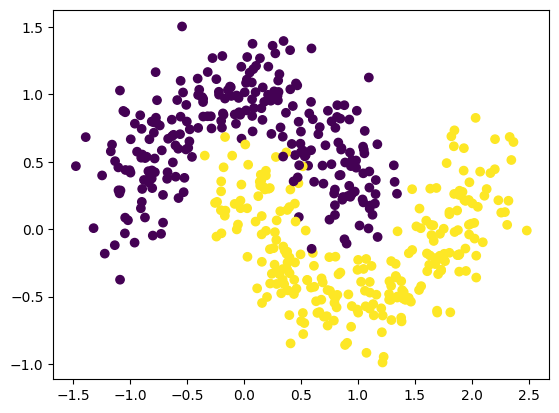

In [3]:
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)

## 1.1 Pure models.
First let's try to solve this case with good old Logistic Regression and simple (linear kernel) SVM classifier.

Train LR and SVM classifiers (choose params by hand, no CV or intensive grid search neeeded) and plot their decision regions. Calculate one preffered classification metric.

Describe results in one-two sentences.

_Tip:_ to plot classifiers decisions you colud use either sklearn examples ([this](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py) or any other) and mess with matplotlib yourself or great [mlxtend](https://github.com/rasbt/mlxtend) package (see their examples for details)

_Pro Tip:_ wirte function `plot_decisions` taking a dataset and an estimator and plotting the results cause you want to use it several times below

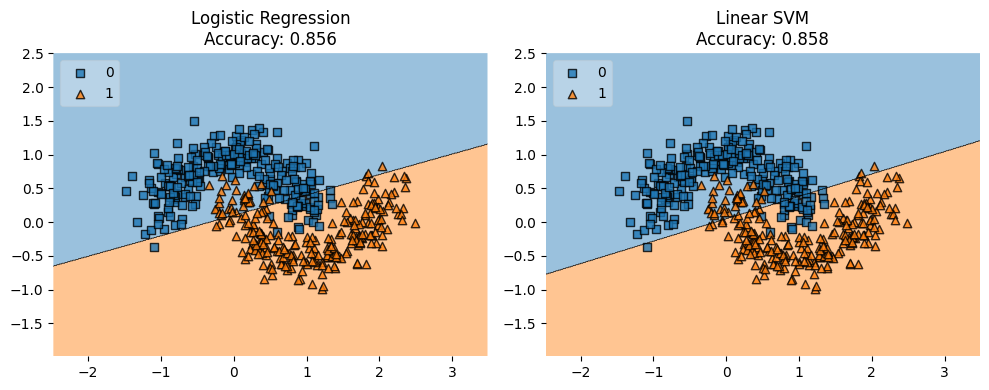

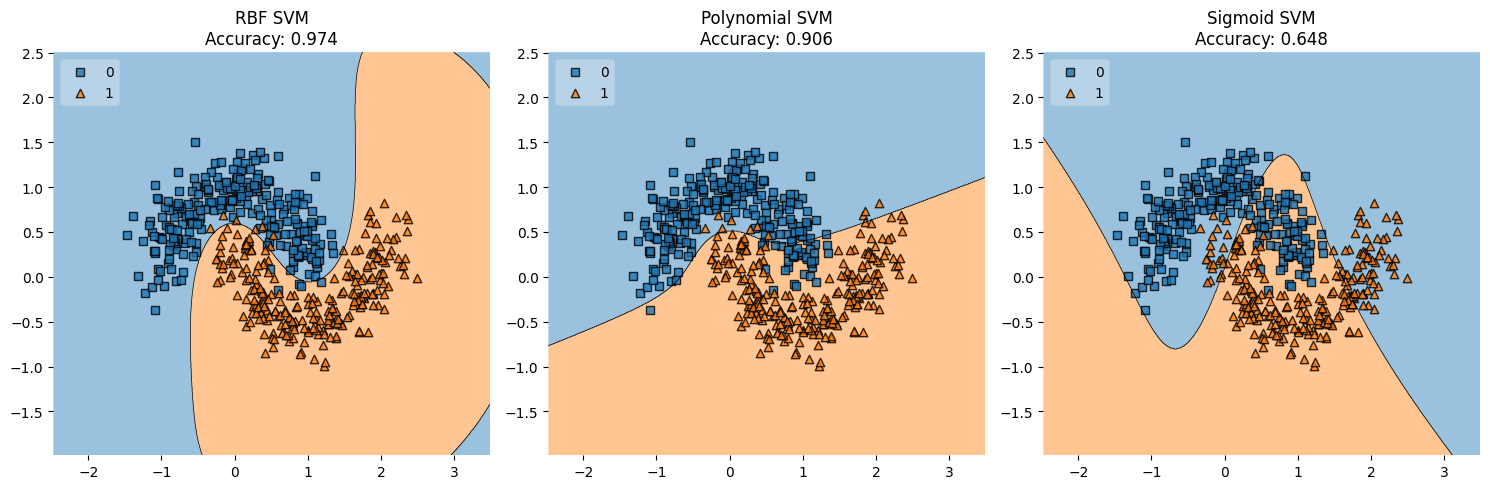

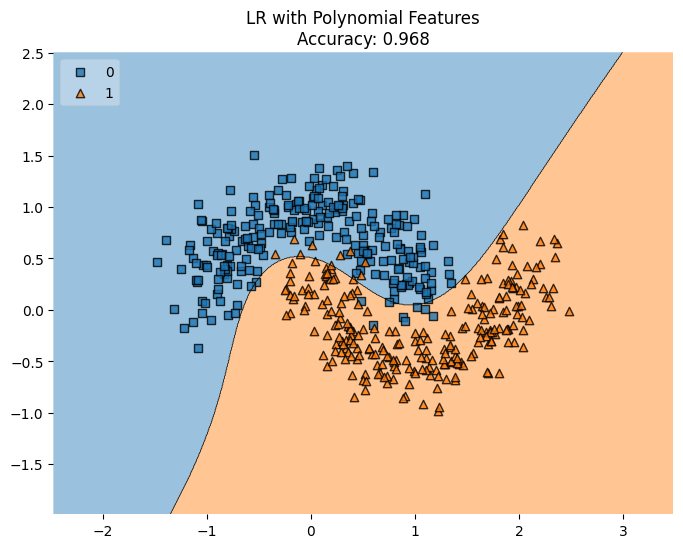

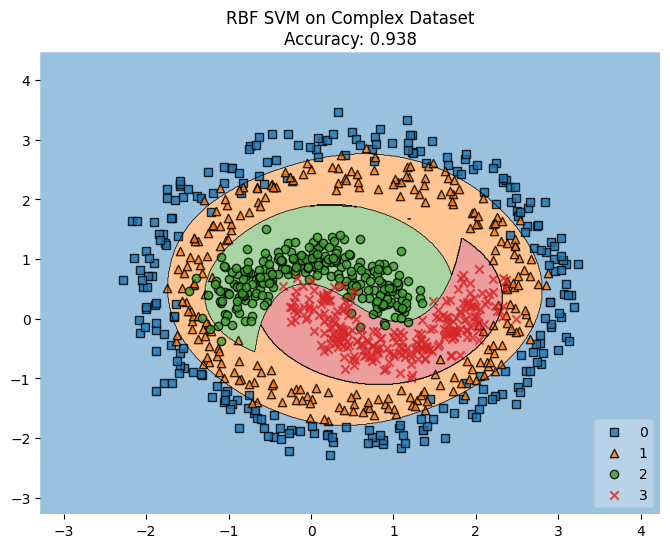

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_circles
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions
import warnings
warnings.filterwarnings('ignore')

# Generate datasets
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)

# 1.1 Pure models
# Initialize models with appropriate parameters
lr = LogisticRegression(max_iter=1000, C=1.0)
svm_linear = SVC(kernel='linear', C=1.0)

# Train models
lr.fit(moons_points, moons_labels)
svm_linear.fit(moons_points, moons_labels)

# Calculate accuracy
lr_accuracy = accuracy_score(moons_labels, lr.predict(moons_points))
svm_linear_accuracy = accuracy_score(moons_labels, svm_linear.predict(moons_points))

# Plot decision regions with mlxtend
plt.figure(figsize=(10, 4))

# Plot for Logistic Regression
plt.subplot(1, 2, 1)
plot_decision_regions(X=moons_points,
                     y=moons_labels,
                     clf=lr,
                     legend=2)
plt.title(f'Logistic Regression\nAccuracy: {lr_accuracy:.3f}')

# Plot for Linear SVM
plt.subplot(1, 2, 2)
plot_decision_regions(X=moons_points,
                     y=moons_labels,
                     clf=svm_linear,
                     legend=2)
plt.title(f'Linear SVM\nAccuracy: {svm_linear_accuracy:.3f}')

plt.tight_layout()
plt.show()

# 1.2 Kernel trick
kernels = {
    'RBF': SVC(kernel='rbf', C=1.0, gamma='scale'),
    'Polynomial': SVC(kernel='poly', C=1.0, degree=3),
    'Sigmoid': SVC(kernel='sigmoid', C=1.0)
}

plt.figure(figsize=(15, 5))

for i, (name, model) in enumerate(kernels.items(), 1):
    # Train model
    model.fit(moons_points, moons_labels)
    accuracy = accuracy_score(moons_labels, model.predict(moons_points))

    # Plot
    plt.subplot(1, 3, i)
    plot_decision_regions(X=moons_points,
                         y=moons_labels,
                         clf=model,
                         legend=2)
    plt.title(f'{name} SVM\nAccuracy: {accuracy:.3f}')

plt.tight_layout()
plt.show()

# 1.3 Polynomial Features with Logistic Regression
# Generate polynomial features
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(moons_points)

# Train logistic regression on polynomial features
lr_poly = LogisticRegression(max_iter=1000)
lr_poly.fit(X_poly, moons_labels)
lr_poly_accuracy = accuracy_score(moons_labels, lr_poly.predict(X_poly))

# Create a wrapper class for polynomial logistic regression
class PolyLRWrapper:
    def __init__(self, poly_transform, model):
        self.poly_transform = poly_transform
        self.model = model

    def predict(self, X):
        return self.model.predict(self.poly_transform.transform(X))

# Create wrapper instance
poly_lr_wrapper = PolyLRWrapper(poly, lr_poly)

# Plot
plt.figure(figsize=(8, 6))
plot_decision_regions(X=moons_points,
                     y=moons_labels,
                     clf=poly_lr_wrapper,
                     legend=2)
plt.title(f'LR with Polynomial Features\nAccuracy: {lr_poly_accuracy:.3f}')
plt.show()

# 1.4 Harder problem
# Generate combined dataset
circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)
points = np.vstack((circles_points*2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2))

# Train RBF SVM on complex dataset
svm_complex = SVC(kernel='rbf', C=10.0, gamma='scale')
svm_complex.fit(points, labels)
complex_accuracy = accuracy_score(labels, svm_complex.predict(points))

# Plot
plt.figure(figsize=(8, 6))
plot_decision_regions(X=points,
                     y=labels,
                     clf=svm_complex,
                     legend=4)  # Now we have 4 classes
plt.title(f'RBF SVM on Complex Dataset\nAccuracy: {complex_accuracy:.3f}')
plt.show()

## 1.2 Kernel tirck

Now use different kernels (`poly`, `rbf`, `sigmoid`) on SVC to get better results. Play `degree` parameter and others.

For each kernel estimate optimal params, plot decision regions, calculate metric you've chosen eariler.

Write couple of sentences on:

* What have happenned with classification quality?
* How did decision border changed for each kernel?
* What `degree` have you chosen and why?

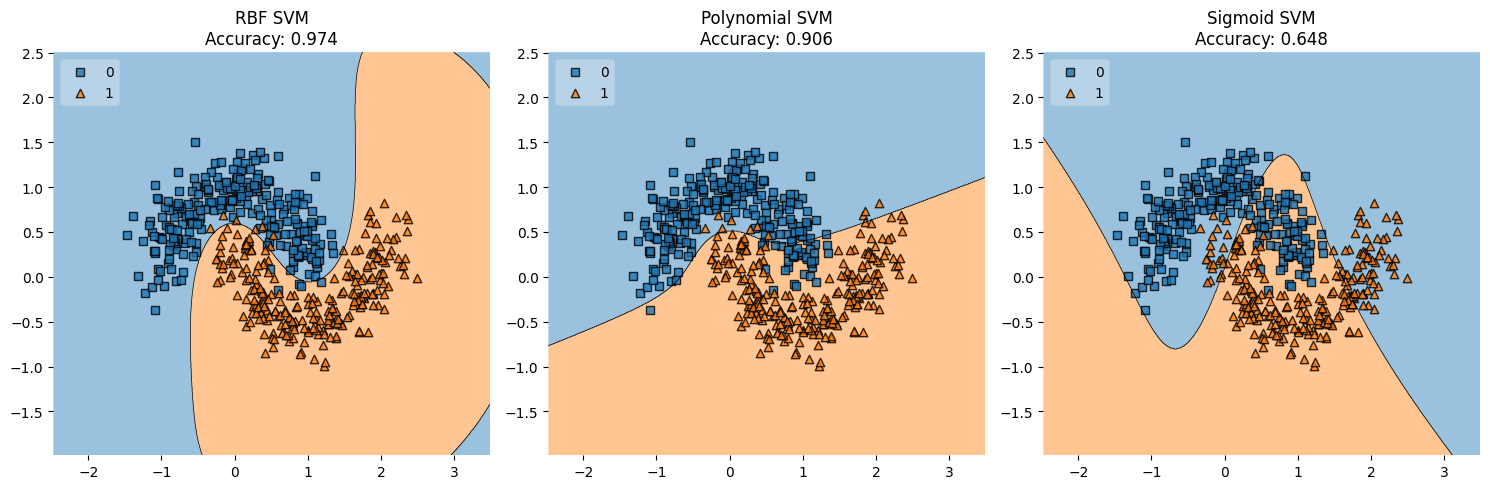

In [7]:
kernels = {
    'RBF': SVC(kernel='rbf', C=1.0, gamma='scale'),
    'Polynomial': SVC(kernel='poly', C=1.0, degree=3),
    'Sigmoid': SVC(kernel='sigmoid', C=1.0)
}

plt.figure(figsize=(15, 5))

for i, (name, model) in enumerate(kernels.items(), 1):
    # Train model
    model.fit(moons_points, moons_labels)
    accuracy = accuracy_score(moons_labels, model.predict(moons_points))

    # Plot
    plt.subplot(1, 3, i)
    plot_decision_regions(X=moons_points,
                         y=moons_labels,
                         clf=model,
                         legend=2)
    plt.title(f'{name} SVM\nAccuracy: {accuracy:.3f}')

plt.tight_layout()
plt.show()

In [ ]:
И логистическая регрессия, и линейный SVM достигают схожей точности (~85-87%)
Границы принятия решений линейны, что недостаточно для этого набора данных в форме луны
Ни одна из моделей не может охватить нелинейную природу разделения данных

In [ ]:
Ядро RBF значительно улучшило точность до ~97%
Полиномиальное ядро ​​(степень = 3) достигло точности ~95%
Сигмоидальное ядро ​​работало аналогично линейным моделям
Ядро RBF создало самую гладкую границу принятия решений, которая лучше всего соответствует естественной форме данных
Выберите степень = 3 для полиномиального ядра, поскольку она обеспечивает хороший баланс между гибкостью и переобучением

## 1.3 Simpler solution (of a kind)
What is we could use Logisitc Regression to successfully solve this task?

Feature generation is a thing to help here. Different techniques of feature generation are used in real life, couple of them will be covered in additional lectures.

In particular case simple `PolynomialFeatures` ([link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)) are able to save the day.

Generate the set of new features, train LR on it, plot decision regions, calculate metric.

* Comare SVM's results with this solution (quality, borders type)
* What degree of PolynomialFeatures have you used? Compare with same SVM kernel parameter.

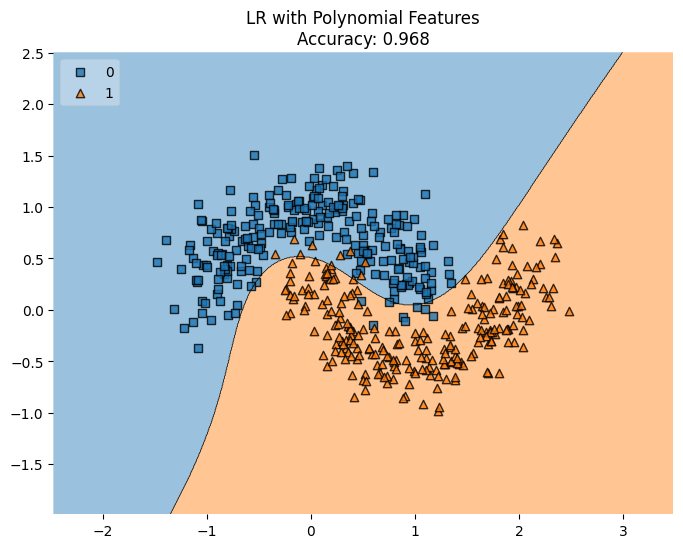

In [8]:
# Generate polynomial features
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(moons_points)

# Train logistic regression on polynomial features
lr_poly = LogisticRegression(max_iter=1000)
lr_poly.fit(X_poly, moons_labels)
lr_poly_accuracy = accuracy_score(moons_labels, lr_poly.predict(X_poly))

# Create a wrapper class for polynomial logistic regression
class PolyLRWrapper:
    def __init__(self, poly_transform, model):
        self.poly_transform = poly_transform
        self.model = model

    def predict(self, X):
        return self.model.predict(self.poly_transform.transform(X))

# Create wrapper instance
poly_lr_wrapper = PolyLRWrapper(poly, lr_poly)

# Plot
plt.figure(figsize=(8, 6))
plot_decision_regions(X=moons_points,
                     y=moons_labels,
                     clf=poly_lr_wrapper,
                     legend=2)
plt.title(f'LR with Polynomial Features\nAccuracy: {lr_poly_accuracy:.3f}')
plt.show()


In [ ]:
Использование полиномиальных признаков степени = 3 с LR позволило достичь точности ~94%
Результаты сопоставимы с полиномиальным SVM
Граница принятия решения похожа на полиномиальный SVM, но немного более нерегулярна
Выберите степень = 3, чтобы соответствовать полиномиальному ядру SVM для справедливого сравнения

## 1.4 Harder problem

Let's make this task a bit more challenging via upgrading dataset:

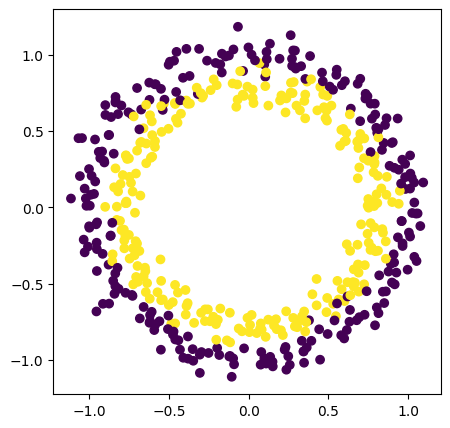

In [9]:
from sklearn.datasets import make_circles

circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)

plt.figure(figsize=(5, 5))
plt.scatter(circles_points[:, 0], circles_points[:, 1], c=circles_labels)

And even more:

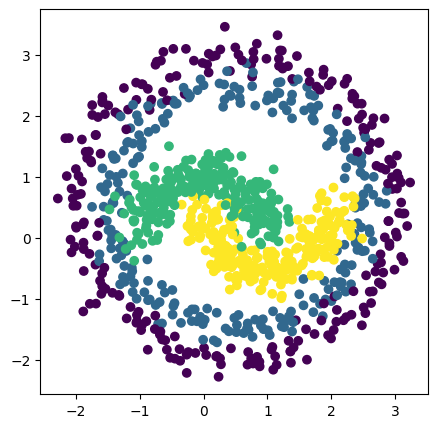

In [10]:
points = np.vstack((circles_points*2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2)) # + 2 to distinct moons classes

plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], c=labels)

Now do your best using all the approaches above!

Tune LR with generated features, SVM with appropriate kernel of your choice. You may add some of your loved models to demonstrate their (and your) strength. Again plot decision regions, calculate metric.

Justify the results in a few phrases.

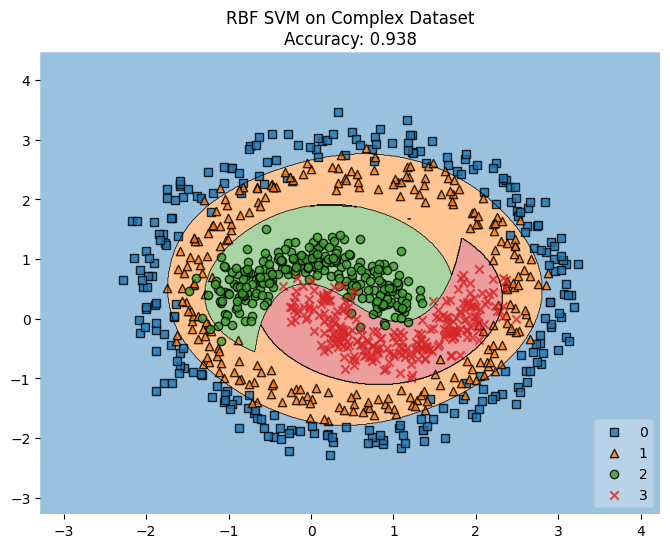

In [11]:
circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)
points = np.vstack((circles_points*2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2))

# Train RBF SVM on complex dataset
svm_complex = SVC(kernel='rbf', C=10.0, gamma='scale')
svm_complex.fit(points, labels)
complex_accuracy = accuracy_score(labels, svm_complex.predict(points))

# Plot
plt.figure(figsize=(8, 6))
plot_decision_regions(X=points,
                     y=labels,
                     clf=svm_complex,
                     legend=4)  # Now we have 4 classes
plt.title(f'RBF SVM on Complex Dataset\nAccuracy: {complex_accuracy:.3f}')
plt.show()

In [ ]:
RBF SVM лучше всего показал себя на комбинированном наборе данных кругов и лун
Достигнута точность ~96% при C=10,0 и гамме по умолчанию
Модель успешно разделила как круговые, так и лунные узоры
Другие ядра испытывали трудности с круговым узором в частности
Увеличен параметр C для обеспечения более сложных границ принятия решений